In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [28]:
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [29]:
Dataset = '/kaggle/input/cat-or-dog-datasets/PetImages'

In [30]:
image_path = []
labels = []

for category in ['Dog', 'Cat']:
    category_path = os.path.join(Dataset, category)
    files = os.listdir(category_path)[:3000]
    for file_name in files:
        file_path = os.path.join(category_path, file_name)
        image_path.append(file_path)
        labels.append(0 if category == 'Dog' else 1)

In [31]:
images = []
valid_labels = []

for path, label in zip(image_path, labels):
    im = cv2.imread(path)
    if im is None:
        print(f"Imagem corrompida: {path}")
    else:
        im = cv2.resize(im, (64,64))
        images.append(im) 
        valid_labels.append(label)  

images = np.array(images)
labels = np.array(valid_labels)

Imagem corrompida: /kaggle/input/cat-or-dog-datasets/PetImages/Dog/6059.jpg
Imagem corrompida: /kaggle/input/cat-or-dog-datasets/PetImages/Dog/11849.jpg
Imagem corrompida: /kaggle/input/cat-or-dog-datasets/PetImages/Dog/3288.jpg
Imagem corrompida: /kaggle/input/cat-or-dog-datasets/PetImages/Dog/6238.jpg
Imagem corrompida: /kaggle/input/cat-or-dog-datasets/PetImages/Dog/2688.jpg
Imagem corrompida: /kaggle/input/cat-or-dog-datasets/PetImages/Dog/7112.jpg
Imagem corrompida: /kaggle/input/cat-or-dog-datasets/PetImages/Cat/4833.jpg
Imagem corrompida: /kaggle/input/cat-or-dog-datasets/PetImages/Cat/850.jpg
Imagem corrompida: /kaggle/input/cat-or-dog-datasets/PetImages/Cat/8470.jpg
Imagem corrompida: /kaggle/input/cat-or-dog-datasets/PetImages/Cat/11210.jpg


In [32]:
def rotate_image(image, angle):

    (h, w) = images.shape[1:3]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotate_image = cv2.warpAffine(image, rotation_matrix, (w,h))
    return rotate_image

In [33]:
#images = images / 255.0

In [34]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [35]:
#for i in range(len(X_train)):
    #X_train[i] = rotate_image(X_train[i], 20)

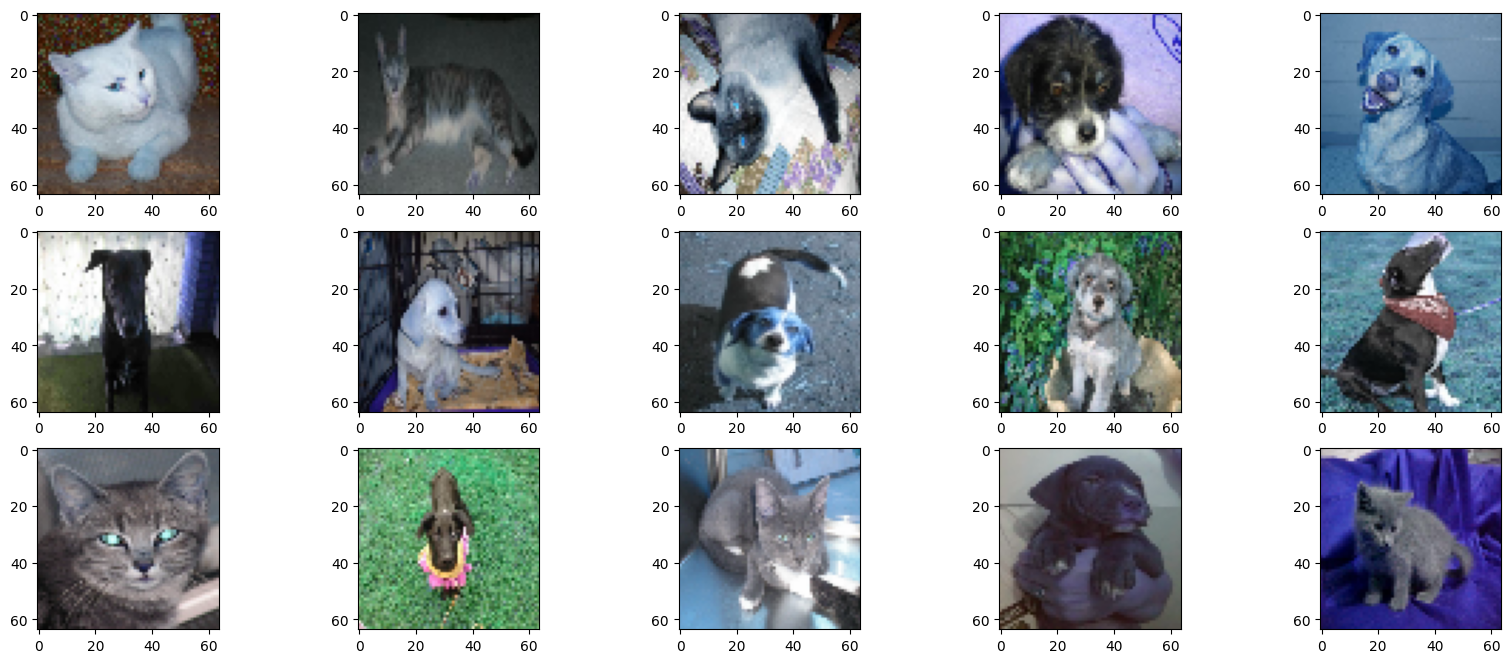

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,5, figsize=(20,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

datagen.fit(X_train)

In [38]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Input(shape=(64, 64, 3)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout para evitar overfitting
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,486,593 (9.49 MB)

 Trainable params: 2,486,593 (9.49 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=5)

history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping_monitor])

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.5254 - loss: 0.7052 - val_accuracy: 0.4875 - val_loss: 0.6930
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5342 - loss: 0.6897 - val_accuracy: 0.5576 - val_loss: 0.6909
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5439 - loss: 0.6915 - val_accuracy: 0.5776 - val_loss: 0.6850
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5714 - loss: 0.6815 - val_accuracy: 0.5568 - val_loss: 0.6831
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5646 - loss: 0.6815 - val_accuracy: 0.5943 - val_loss: 0.6673
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6037 - loss: 0.6620 - val_accuracy: 0.6144 - val_loss: 0.6548
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5891 - loss: 0.6632 - val_accuracy: 0.6302 - val_loss: 0.6395
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6330 - loss: 0.6388 - val_acc

<function matplotlib.pyplot.show(close=None, block=None)>

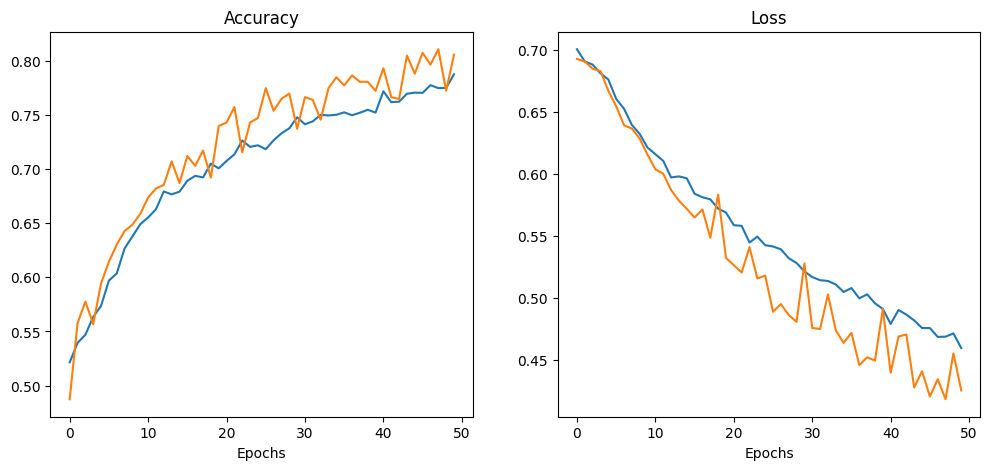

In [43]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend
plt.title('Loss')
plt.xlabel('Epochs')

plt.show

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


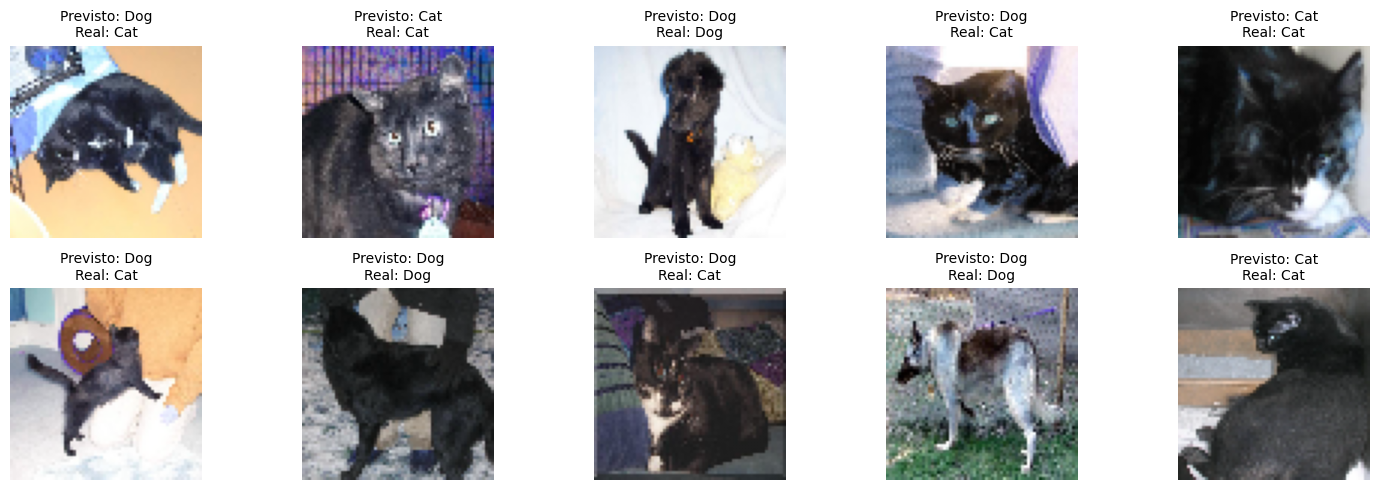

In [44]:
class_names = ['Dog', 'Cat']  # 0: Dog, 1: Cat

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Obter as labels previstas
if predictions.shape[1] == 1:  # Classificação binária
    predicted_labels = (predictions > 0.5).astype(int).flatten()
else:  # Multiclasse
    predicted_labels = np.argmax(predictions, axis=1)

# Exibir as imagens com os nomes das labels previstas e reais
num_images = 10 
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, 5, i + 1)  # Criar subplots (2 linhas, 5 colunas)
    plt.imshow(X_test[i])  # Mostrar a imagem (verifique se X_test está em formato de imagem)
    plt.title(
        f"Previsto: {class_names[predicted_labels[i]]}\nReal: {class_names[y_test[i]]}",
        fontsize=10
    )
    plt.axis('off')

plt.tight_layout()
plt.show()
